In [1]:
import networkx as nx

import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
import pandas as pd

In [2]:
np.set_printoptions(suppress=True)

Dane pochodzą z: https://figshare.com/articles/dataset/The_Copenhagen_Networks_Study_interaction_data/7267433/1

In [3]:
df = pd.read_csv('calls.csv')
df.head()

,timestamp,caller,callee,duration
0,184,300,301,121
1,3920,512,299,670
2,5623,301,300,504
3,9252,401,457,-1
4,15466,512,0,5


In [4]:
colors = ['#94c5bc', '#64ad62', '#1a8828', '#0a6921', '#094f29']
quantils = np.quantile(df.duration, np.linspace(0, 1, 5))

In [5]:
def color_map(value):
    for i in range(5):
        if value <= quantils[i]:
            return colors[i]
    return colors[4]

In [6]:
df.insert(4, 'color', list(map(color_map, df.duration)))
df.head()

,timestamp,caller,callee,duration,color
0,184,300,301,121,#094f29
1,3920,512,299,670,#094f29
2,5623,301,300,504,#094f29
3,9252,401,457,-1,#94c5bc
4,15466,512,0,5,#1a8828


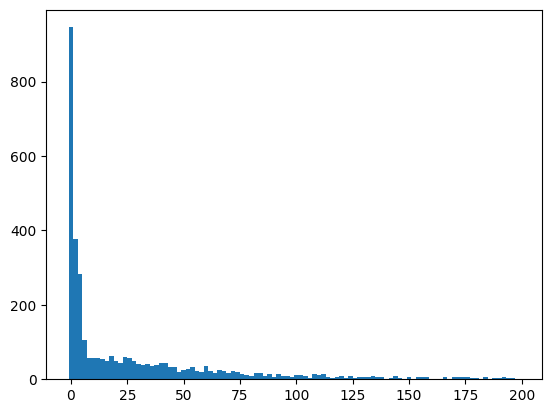

In [7]:
plt.hist(df.duration[df.duration < 200], bins=100)
plt.show()

In [8]:
graph = nx.from_pandas_edgelist(df, source='caller', target='callee')
nx.set_node_attributes(graph, dict(zip(df.caller, df.color)), 'color')

node_color=[v[1]['color'] if 'color' in v[1] else colors[4] for v in graph.nodes(data=True)]

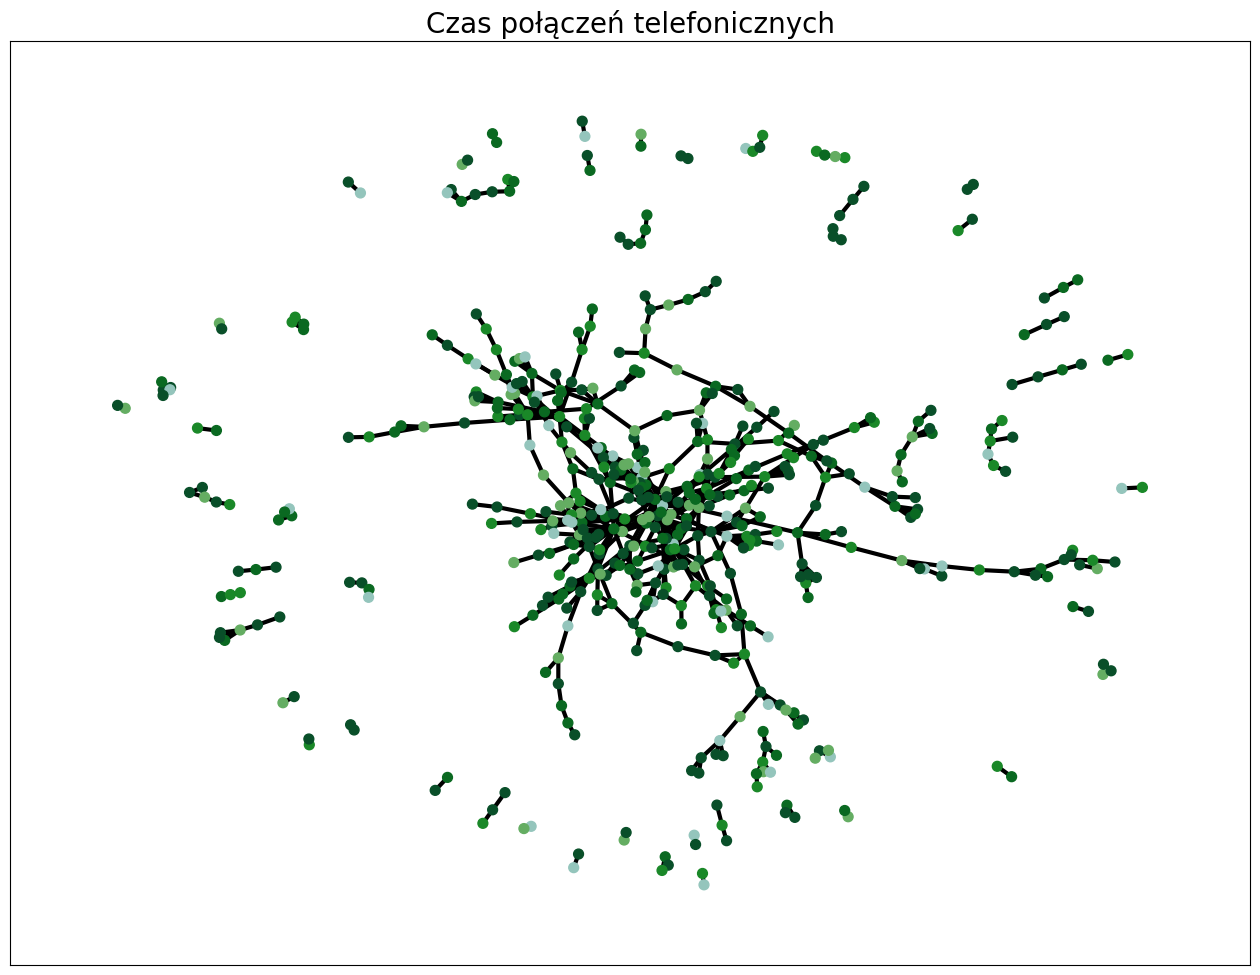

In [44]:
# nx.draw(graph, width=100, node_size=10)
fig, ax = plt.subplots(1, 1, figsize=(16, 12))

ax.set_title('Czas połączeń telefonicznych', fontsize=20)

pos = nx.spring_layout(graph, seed=2137)
nx.draw_networkx_nodes(graph, pos, node_size=50, node_color=node_color, ax=ax)
nx.draw_networkx_edges(graph, pos, width=3, ax=ax)

plt.savefig('graph.png')
plt.show()

Im ciemniejszy kolor tym dłuższe było połączenie.